### 자료 출처
- 데이터 다운로드 : localdata.go.kr
    - 지방자치단체에서 인/허가한 업종별 데이터 제공
    - 문화, 체육, 관광, 식품 등 11가지 분야에 대한 데이터 제공
    - 회원 가입 절차를 별도로 거치지 않고도 공공데이터 다운로드
## 서울시 자치구 서대문구에서 치킨집이 가장 많은 동

In [58]:
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
print(pd.__version__)
print(np.__version__)
import seaborn as sns
print(sns.__version__)
import matplotlib
print(matplotlib.__version__)
import folium
print(folium.__version__)

2.2.3
2.2.1
0.12.2
3.10.0
0.14.0


In [3]:
# !pip install --upgrade pandas==2.0.0  
# !pip install --upgrade matplotlib==3.7.3  
# !pip install --upgrade seaborn==0.12.2  
# !pip install --upgrade folium==0.14.0

In [4]:
data = pd.read_csv("./data/서울특별시_일반음식점.csv", encoding ="cp949", low_memory=False)
data.head()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0,N,13.65,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

- 인허가된 점포 data(변수) : 음식점, 치킨
    - 위생업태명
    - 업태구분
- 현재 운영중인지의 여부 : 영업상태
- 주소가 서대문구인지 여부 : (도로명 전체주소/소재지 전체주소)

In [9]:
print(list(data.위생업태명.unique()))
print(set(data.위생업태명.values))

['한식', '일식', '분식', '기타', '출장조리', '식육(숯불구이)', '중국식', '경양식', '호프/통닭', '까페', '정종/대포집/소주방', '뷔페식', '김밥(도시락)', '통닭(치킨)', '횟집', '패밀리레스트랑', '감성주점', '외국음식전문점(인도,태국등)', '라이브카페', '복어취급', '키즈카페', '패스트푸드', '탕류(보신용)', '냉면집', '커피숍', nan, '전통찻집', '이동조리', '룸살롱', '식품등 수입판매업', '간이주점', '다방', '일반조리판매', '기타 휴게음식점', '제과점영업', '식품소분업']
{'식품등 수입판매업', '라이브카페', nan, '일반조리판매', '통닭(치킨)', '한식', '감성주점', '복어취급', '출장조리', '패밀리레스트랑', '외국음식전문점(인도,태국등)', '탕류(보신용)', '제과점영업', '식육(숯불구이)', '중국식', '횟집', '분식', '호프/통닭', '다방', '기타', '커피숍', '전통찻집', '까페', '식품소분업', '간이주점', '김밥(도시락)', '패스트푸드', '일식', '기타 휴게음식점', '이동조리', '냉면집', '경양식', '룸살롱', '뷔페식', '정종/대포집/소주방', '키즈카페'}


In [8]:
print(list(data.업태구분명.unique()))
print(set(data.업태구분명.values))

['한식', '일식', '분식', '기타', '출장조리', '식육(숯불구이)', '중국식', '경양식', '호프/통닭', '까페', '정종/대포집/소주방', '뷔페식', '김밥(도시락)', '통닭(치킨)', '횟집', '패밀리레스트랑', '감성주점', '외국음식전문점(인도,태국등)', '라이브카페', '복어취급', '키즈카페', '패스트푸드', '탕류(보신용)', '냉면집', '커피숍', nan, '전통찻집', '이동조리', '룸살롱', '식품등 수입판매업', '간이주점', '다방', '일반조리판매', '기타 휴게음식점', '제과점영업', '식품소분업', '193959.150482967']
{'식품등 수입판매업', '라이브카페', nan, '일반조리판매', '통닭(치킨)', '한식', '감성주점', '복어취급', '출장조리', '패밀리레스트랑', '외국음식전문점(인도,태국등)', '탕류(보신용)', '제과점영업', '식육(숯불구이)', '중국식', '횟집', '분식', '호프/통닭', '다방', '기타', '커피숍', '전통찻집', '까페', '식품소분업', '간이주점', '김밥(도시락)', '패스트푸드', '193959.150482967', '일식', '기타 휴게음식점', '이동조리', '냉면집', '경양식', '룸살롱', '뷔페식', '정종/대포집/소주방', '키즈카페'}


In [25]:
# 레코드들이 위생업태명에 통닭이나 치킨 문자열이 포함되어 있는지 확인
# 문자열.contains(확인하려는 문자열, na=False)
# data.업태구분명.str.contains("통닭|치킨", na=False)

len(set(data[data["업태구분명"].str.contains("통닭|치킨", na=False)]))
# len(data[data["업태구분명"].str.contains("통닭|치킨", na=False)]["업태구분명"])


48

In [29]:
# data[(data.영업상태명=="영업/정상") & data.위생업태명.str.contains("통닭|치킨", na=False)]

In [34]:
# 서울시에서 영업중인 치킨집 레코드 추출 isin 사용
data_ing = data[(data.영업상태명=="영업/정상") & data.위생업태명.isin(["통닭(치킨)", "호프/통닭"])]

In [38]:
data_addr = data_ing[["소재지전체주소", "위생업태명"]]
addr_cond = data_addr["소재지전체주소"].str.contains("서대문구", na=False)
data_sdmg = data_addr[addr_cond]
data_sdmg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 178 to 124130
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   소재지전체주소  400 non-null    object
 1   위생업태명    400 non-null    object
dtypes: object(2)
memory usage: 9.4+ KB


### 서대문구 각 동의 치킨집 수를 연산
- 동 정보는 주소에 있음(주소는 규칙이 있음)
    - ex. 서울특별시 서대문구 연희동 131-1번지 사러가쇼핑
        - 앞 5글자 : 광역시도
        - 공백
        - 4글자 : 자치구
        - 공백
        - 서대문구 주소는  11글자를 skip 하면 동정보가 나옴
        - 동데이터는 5글자를 추출 후 불필요한 문자는 제거 후 사용(문자열 전처리)
        - 주소 문자열의 11번 인덱스부터 16인덱스 위치까지 추출
- 문자열 함수 중  slice(start=시작인덱스, stop=끝인덱스 + 1)

In [39]:
addr = data_sdmg.소재지전체주소.str.slice(start=11, stop=17)
addr

178       창천동 33
698       홍제동 45
724       남가좌동 3
1200      연희동 13
1405      창천동 52
           ...  
122500    남가좌동 3
123490    홍제동 30
123548    홍제동 96
123724    북아현동 1
124130    남가좌동 3
Name: 소재지전체주소, Length: 400, dtype: object

In [40]:
import re
re.sub(r'[0-9]+', '', '남가좌동 3').replace(' ', '')

'남가좌동'

In [43]:
# 시리즈의 각 요소를 순회하면서 정규식 함수 적용 후 반환 결과를 다시 시리즈에 저장
i = 0
addrFin = pd.Series()
for string in addr :
    newstr = re.sub(r'[0-9]+', '', string).replace(' ', '')
    addrFin[i]=newstr
    i+=1
addrFin    

0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
395    남가좌동
396     홍제동
397     홍제동
398    북아현동
399    남가좌동
Length: 400, dtype: object

In [49]:
# 서대문구 각 동의 치킨집이 몇개나 있는지 확인 가능
# df에 value_counts()를 할 수 있으나 효율적이지 않다
# pd.Series.value_counts() : 시리즈 내의 value를 기준으로 동일한 value를 count
addrFin.value_counts()
# 문자열 추가 제거
addrFin = addrFin.str.replace("-", "").str.replace("옥천동번", "옥천동")
ckCnt = addrFin.value_counts()
ckCnt

창천동     91
홍제동     48
북가좌동    48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
옥천동      3
영천동      2
합동       2
천연동      2
대신동      1
Name: count, dtype: int64

###  tree map 그래프를 활용한 시각화
- heatmap과 비슷한 그래프 : heatmat이 data의 크기를 색상으로 규정하는데 반해
    - treemap은 사각형 내부 조각의 크기를 이용해서 data 크기 표현
    - python treemap : squarifty 패키지 사용 pip install squarify
    - squarify.plot(데이터, label=그래프에 표시할 데이터)

In [51]:
# !pip install squarify

In [54]:
ckCnt.values
ckCnt.index

Index(['창천동', '홍제동', '북가좌동', '남가좌동', '홍은동', '연희동', '충정로가', '북아현동', '대현동',
       '냉천동', '미근동', '옥천동', '영천동', '합동', '천연동', '대신동'],
      dtype='object')

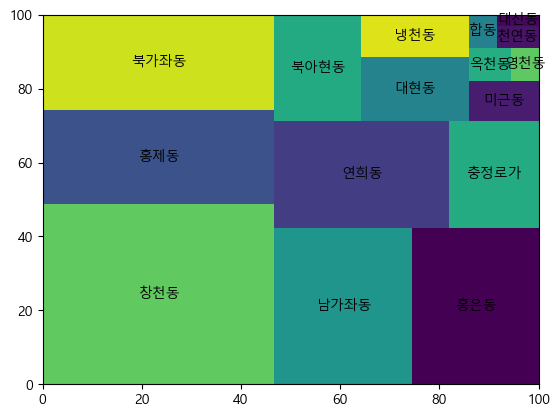

In [59]:
import squarify

squarify.plot(ckCnt, label=ckCnt.index)
plt.show()

### 연습
1. 정상영업/폐업 상관없이 현 시점(파일기준) 치킨집의 인허가 분포도(25개 자치구별)
2. 영업중인 구별 치킨집 인허가 분포도
3. 폐업한 구별 치킨집 인허가 분포도
4. 강남구 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각)

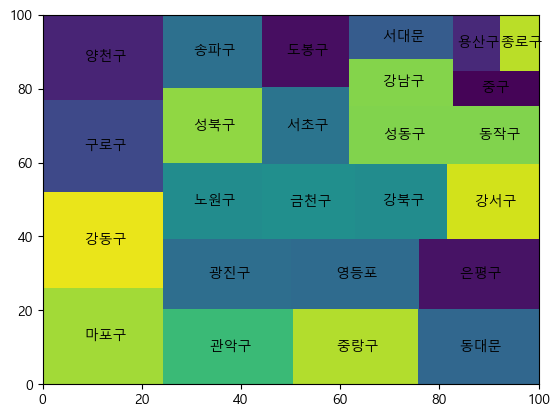

In [86]:
data_chicken = data[(data.위생업태명.isin(["통닭(치킨)", "호프/통닭"]))]
data_seoul_chicken = data_chicken[data_chicken.소재지전체주소.str.contains("서울특별시", na=False)]

data_addr = data_seoul_chicken[["소재지전체주소", "위생업태명"]]
addr = data_addr.소재지전체주소.str.slice(start=5, stop=9).replace(" ", "")
seoulCnt = addr.value_counts()

squarify.plot(seoulCnt, label=seoulCnt.index)
plt.show()

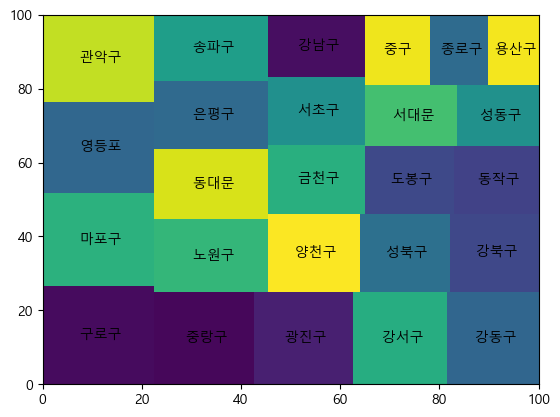

In [92]:
data_ing = data[(data.영업상태명=="영업/정상") & data.위생업태명.isin(["통닭(치킨)", "호프/통닭"])]
data_ing_addr = data_ing[data_ing.소재지전체주소.str.contains("서울특별시", na=False)]

data_addr = data_ing_addr[["소재지전체주소", "위생업태명"]]
addr = data_addr.소재지전체주소.str.slice(start=5, stop=9).replace(" ", "")
seoulCnt = addr.value_counts()

squarify.plot(seoulCnt, label=seoulCnt.index)
plt.show()

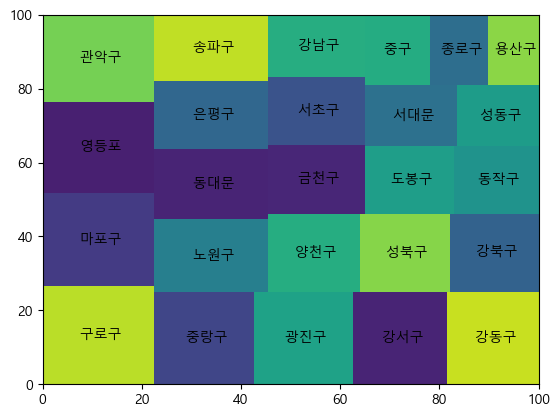

In [91]:
data_closed = data[(data.영업상태명=="폐업") & data.위생업태명.isin(["통닭(치킨)", "호프/통닭"])]
data_closed_addr = data_closed[data_closed.소재지전체주소.str.contains("서울특별시", na=False)]

data_addr = data_closed_addr[["소재지전체주소", "위생업태명"]]
addr = data_addr.소재지전체주소.str.slice(start=5, stop=9).replace(" ", "")
seoulCnt = addr.value_counts()

squarify.plot(seoulCnt, label=seoulCnt.index)
plt.show()

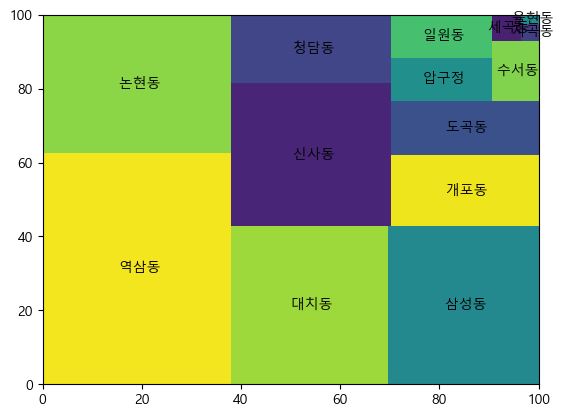

In [121]:
# 강남구 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각)
data_chinese = data[(data.위생업태명.str.contains("중국식", na=False))]
data_chinese_gangnam = data_chinese[data_chinese.소재지전체주소.str.contains("강남구", na=False)]

addr = data_chinese_gangnam.소재지전체주소.str.slice(start=9, stop=13)
# data_chinese_gangnam.소재지전체주소 = data_chinese_gangnam.소재지전체주소.str.split()[:][1]
data_chinese_dong = addr.value_counts()

squarify.plot(data_chinese_dong, label=data_chinese_dong.index)
plt.show()

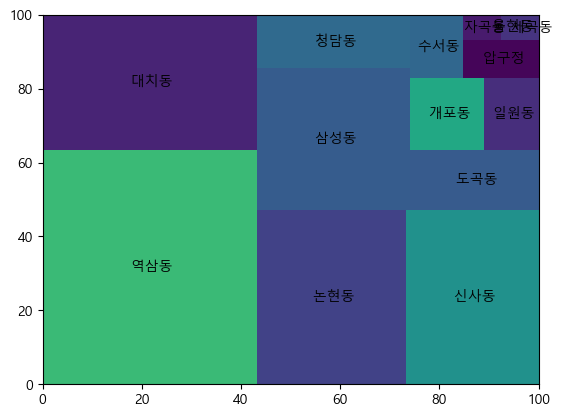

In [108]:
# 강남구 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각)
data_chinese_open = data[(data.영업상태명=="영업/정상")&(data.위생업태명.str.contains("중국식", na=False))]
data_open = data_chinese_open[data_chinese_open.소재지전체주소.str.contains("강남구", na=False)]

addr = data_open.소재지전체주소.str.slice(start=9, stop=13)
data_open_dong = addr.value_counts()

squarify.plot(data_open_dong, label=data_open_dong.index)
plt.show()

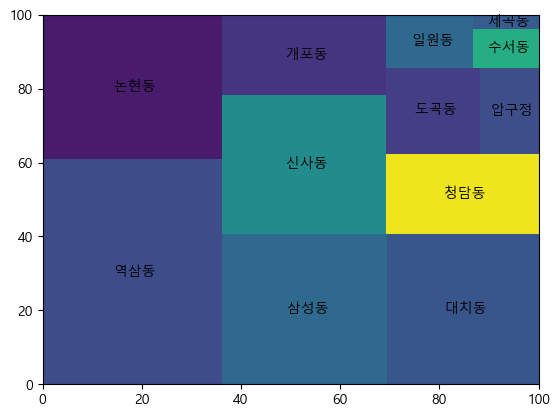

In [109]:
# 강남구 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각)
data_chinese_closed = data[(data.영업상태명=="폐업")&(data.위생업태명.str.contains("중국식", na=False))]
data_closed = data_chinese_closed[data_chinese_closed.소재지전체주소.str.contains("강남구", na=False)]

addr = data_closed.소재지전체주소.str.slice(start=9, stop=13)
data_closed_dong = addr.value_counts()

squarify.plot(data_closed_dong, label=data_closed_dong.index)
plt.show()

-----------------

In [122]:
dataClose = data[data.영업상태명=="폐업"]

res = dataClose.소재지전체주소.str.split()
dataClsFin = []
for idx in res.index:
    try :
        a=res.loc[idx][1]
    except :
        pass # 아래 append 코드 건너뛰고 for문으로 올라감
    dataClsFin.append(a)

In [132]:
# pd.Series(dataClsFin).value_counts()
dataTmp = pd.Series(dataClsFin)

In [133]:
tmp = []
for s in dataTmp:
    tmp.append(s not in ["성남시", "고양시", "제주시", "수영구"])
clsFin = dataTmp[tmp].value_counts()

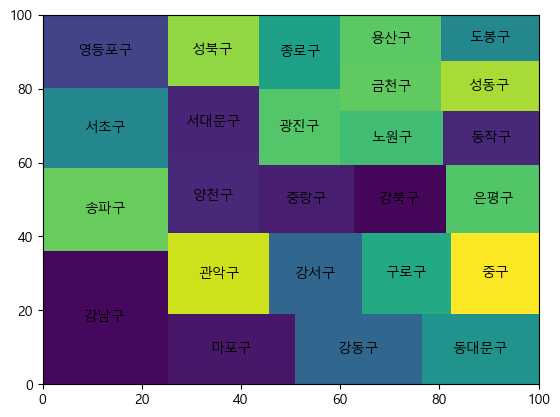

In [135]:
squarify.plot(clsFin, label=clsFin.index)
plt.show()

In [136]:
import json

In [137]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding="utf-8"))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [139]:
# 서울 중심을 기준으로 지도 생성
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map

In [142]:
map.choropleth(geo_data=geo_str,
               data=clsFin,
               columns=[clsFin.index, clsFin],
              key_on="feature.id",
              fill_color="PuRd",
              legend_name="폐업현황",
              )
folium.LayerControl().add_to(map)
map